# Complex Series Plotter

For this project I made a complex number plotter that uses Sympy as a backend for any functions I'd want to graph. I've always wanted an easy way to graph stuff on the complex plane (especially in a reusable way) and this project is a good start.



In [3]:
import math
import cmath
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [4]:
x, t, z, s, a, b, c = symbols('x, t, z, s, a, b, c')
k, m, n = symbols('k m n', integer=True)
init_printing(fontsize='200pt', use_latex='mathjax')

In [5]:
testIntegral = Integral(sqrt(1/x),x)
display(testIntegral)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           

In [6]:
testSum = Sum(1/k, (k, 1, oo))
display(testSum)

  ∞    
 ____  
 ╲     
  ╲    
   ╲  1
   ╱  ─
  ╱   k
 ╱     
 ‾‾‾‾  
k = 1  

In [7]:
# This function outputs n-th roots of unity raised to arbitrary powers
# These will be the building blocks of many other functions 
def rootOfUnityPower(numerator: int, denominator: int) -> Symbol:
    return exp((2 * pi * I * numerator) / denominator)

rootOfUnityPower(1,7)

 2⋅ⅈ⋅π
 ─────
   7  
ℯ     

In [8]:
rootOfUnityZetaSeries = Sum(rootOfUnityPower(n,b) / (n ** s), (n, 1, oo))
display(rootOfUnityZetaSeries)
display(rootOfUnityZetaSeries.subs({s:2,b:3}))
display(rootOfUnityZetaSeries.evalf(subs={s:2,b:3}))

  ∞               
 ____             
 ╲                
  ╲        2⋅ⅈ⋅π⋅n
   ╲       ───────
   ╱   -s     b   
  ╱   n  ⋅ℯ       
 ╱                
 ‾‾‾‾             
n = 1             

  ∞            
______         
╲              
 ╲             
  ╲     2⋅ⅈ⋅π⋅n
   ╲    ───────
    ╲      3   
    ╱  ℯ       
   ╱   ────────
  ╱        2   
 ╱        n    
╱              
‾‾‾‾‾‾         
n = 1          

-0.54805 + 0.6765⋅ⅈ

In [9]:
def rootOfUnityZetaFunction(nthRootOfUnity : int, rotationalOffset : int, sValue : complex) -> Symbol:
    effectiveOffset = rotationalOffset % nthRootOfUnity    
    return rootOfUnityPower(n + effectiveOffset, nthRootOfUnity) / (n ** sValue)

rootOfUnityZetaFunction(5, 0, 3)

 2⋅ⅈ⋅π⋅n
 ───────
    5   
ℯ       
────────
    3   
   n    

In [10]:
display(Sum(1/n**2, (n, 1, oo)))
display(Sum(1/n**2, (n, 1, oo)).doit())
display(Sum(1/n**3, (n, 1, oo)))
display(Sum(1/n**3, (n, 1, oo)).doit())
display(Sum(1/n**4, (n, 1, oo)))
display(Sum(1/n**4, (n, 1, oo)).doit())

  ∞     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   2
  ╱   n 
 ╱      
 ‾‾‾‾   
n = 1   

 2
π 
──
6 

  ∞     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   3
  ╱   n 
 ╱      
 ‾‾‾‾   
n = 1   

ζ(3)

  ∞     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   4
  ╱   n 
 ╱      
 ‾‾‾‾   
n = 1   

 4
π 
──
90

##### **Evaluating series using sequences**
Constructing series as sequences rather than entire formulas allows for a finer control over how the series is calculated and displayed.
By first creating a sequence of a function and then evaluating the series term by term it makes it much easier to take partial sums or plot values at particular points.



In [11]:
def sequenceBuilder(sympyFunc : Function ,startIndex : int, endIndex : int) -> SeqFormula:
    # I don't like the normal syntax so this function just wraps the base sequence function          
    return sequence(sympyFunc, (n, startIndex, endIndex))

In [12]:
rootOfUnityHarmonic = rootOfUnityPower(n, 1) / n
rootOfUnityHarmonicSequence = sequenceBuilder(rootOfUnityHarmonic, 1, 10)
display(rootOfUnityHarmonicSequence)

[1, 1/2, 1/3, 1/4, …]

In [13]:
def partialSumSequence(inputSequence : SeqFormula):
    outputSequence = []
    partialSum = 0    
    for i in range(0, inputSequence.length):
        partialSum += inputSequence[i]
        outputSequence.append(partialSum)
    return outputSequence     

output = partialSumSequence(rootOfUnityHarmonicSequence)
display(output)
display(output[rootOfUnityHarmonicSequence.length - 1].evalf())

⎡              25  137  49  363  761  7129  7381⎤
⎢1, 3/2, 11/6, ──, ───, ──, ───, ───, ────, ────⎥
⎣              12   60  20  140  280  2520  2520⎦

2.92896825396825

In [14]:
# This method adds together a sequence of values and then evaluates it to an arbitray precision
def evaluateSum(inputSeq : SeqFormula, precision : int):    
    return N(summation(inputSeq.formula, (n, inputSeq.interval.left, inputSeq.interval.right)), precision) 

display(evaluateSum(rootOfUnityHarmonicSequence,15))

2.92896825396825

In [15]:
# Comparing ways to sum a series
sumVersion = Sum(rootOfUnityZetaFunction(3, 0, 3), (n, 1, 1000))
display(sumVersion)

# Using sequences
z1 = rootOfUnityZetaFunction(3,0, 3)
zs1 = sequenceBuilder(z1, 1, 1000)
display(evaluateSum(zs1,15))

# Using Sum objects
display(sumVersion.evalf(n=15))


 1000          
______         
╲              
 ╲             
  ╲     2⋅ⅈ⋅π⋅n
   ╲    ───────
    ╲      3   
    ╱  ℯ       
   ╱   ────────
  ╱        3   
 ╱        n    
╱              
‾‾‾‾‾‾         
n = 1          

-0.534247512514876 + 0.765587079102405⋅ⅈ

-0.534247512514876 + 0.765587079102405⋅ⅈ

In [16]:
# This function plots partial sums tip to tail in the complex plane
def complexPlotPartialSum(inputSequence : SeqFormula):    
    listVersion = list(inputSequence)    
    lastX = 0
    lastY = 0
    for i in range(0, len(listVersion)):
        realComp = complex(inputSequence[i]).real
        imagComp = complex(inputSequence[i]).imag
        plt.plot([lastX, realComp], [lastY, imagComp])  
        lastX = realComp
        lastY = imagComp

    plt.axis('square')
    plt.show()    

In [17]:
# This function plots sequences tip to tail in the complex plane
def complexPlotSequence(inputSequence : SeqFormula):    
    listVersion = list(inputSequence)    
    lastX = 0
    lastY = 0
    plt.axis('square')
    plt.show() 
    for i in range(0, len(listVersion)):        
        realComp = complex(inputSequence[i]).real
        imagComp = complex(inputSequence[i]).imag
        if(i != 0):
            plt.plot([lastX, realComp], [lastY, imagComp])  
        else:
            plt.plot(realComp, imagComp) # Might add a dot here 
        lastX = realComp
        lastY = imagComp

       

 1000       
_____       
╲           
 ╲     ⅈ⋅π⋅n
  ╲    ─────
   ╲     15 
   ╱  ℯ     
  ╱   ──────
 ╱      n   
╱           
‾‾‾‾‾       
n = 1       

'Plot of partial sums'

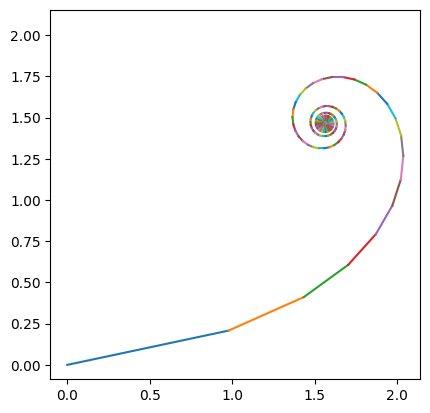

1.56902977935108 + 1.46886825403257⋅ⅈ

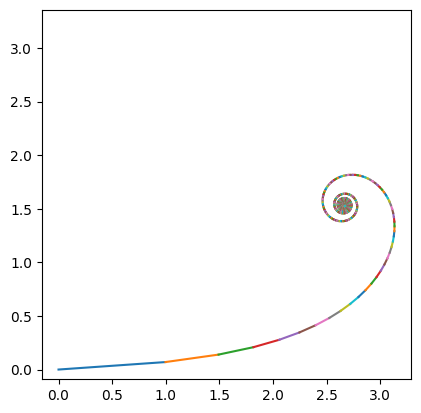

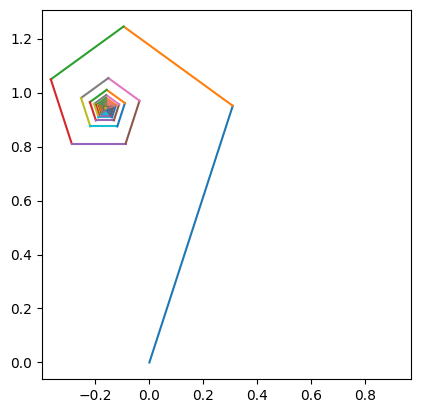

In [18]:
rootOfUnity = 30
sValue = 1
offset = 0
numTerms = 1000

# I might try to make a plotter that only asks for a function as input along with ranges
# It would also be nice to be able to freely convert from Sum Objects to Sequences
functionToPlot = rootOfUnityZetaFunction(rootOfUnity, offset, sValue)
display(Sum(functionToPlot, (n, 1, numTerms)))
functionSequence = sequenceBuilder(functionToPlot, 1, numTerms)

# Plot of the sequence
# Really only shows that a sequence converges to 0
#display('Sequence values')
#complexPlotSequence(functionSequence) 

# Plot of the partial sums
display('Plot of partial sums')
complexPlotPartialSum(partialSumSequence(functionSequence))
display(evaluateSum(functionSequence,15))

#Extra
complexPlotPartialSum(partialSumSequence(sequenceBuilder(rootOfUnityZetaFunction(90, 0, 1), 1, numTerms)))
complexPlotPartialSum(partialSumSequence(sequenceBuilder(rootOfUnityZetaFunction(5, 0, 1), 1, numTerms)))
#This one is super slow, delete if neeeded
#complexPlotPartialSum(partialSumSequence(sequenceBuilder(rootOfUnityZetaFunction(2.5, 0, 1), 1, numTerms)))


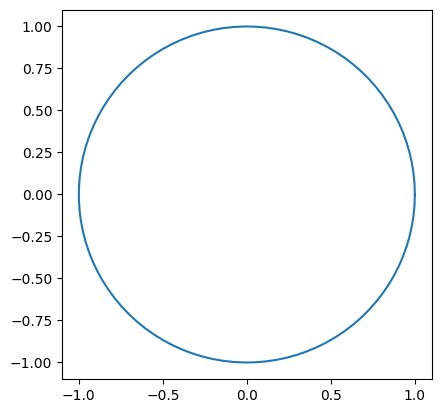

In [19]:
# Trying to think how I could use linspace for the above
xVal = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(xVal), np.sin(xVal))
plt.axis('square')
plt.show()


 1000           
_____           
╲               
 ╲     2⋅ⅈ⋅π⋅n⋅x
  ╲    ─────────
   ╲       b    
   ╱  ℯ         
  ╱   ──────────
 ╱        n     
╱               
‾‾‾‾‾           
n = 1           

 1000            
_____            
╲                
 ╲     2440⋅ⅈ⋅π⋅n
  ╲    ──────────
   ╲       67    
   ╱  ℯ          
  ╱   ───────────
 ╱         n     
╱                
‾‾‾‾‾            
n = 1            

'Plot of partial sums of fourier modulo function'

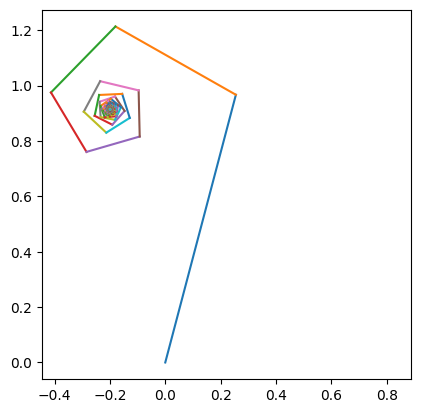

-0.199059841132322 + 0.913582028952504⋅ⅈ

0.913582028952504

1220 mod 67 = 


14.0162531590863

In [20]:
numTerms = 1000
xValue = 1220
bValue = 67

functionToPlot = rootOfUnityPower(x * n, b) / n        
functionToPlot2 = (b / 2) - (b / pi) * im(rootOfUnityPower(x * n, b) / n) 

display(Sum(functionToPlot, (n, 1, numTerms)))
functionToPlot = functionToPlot.subs({x:xValue, b:bValue})

display(Sum(functionToPlot, (n, 1, numTerms)))
functionSequence = sequenceBuilder(functionToPlot, 1, numTerms)

display('Plot of partial sums of fourier modulo function')
complexPlotPartialSum(partialSumSequence(functionSequence))
finalSum = evaluateSum(functionSequence,15)
display(finalSum)
display(im(finalSum))
print(xValue, 'mod', bValue, '= ')
display(((bValue / 2) - (bValue / pi) * im(finalSum)).evalf(15))

In [21]:
polylogarithm = Sum(z**k /k**s, (k, 1, oo))
display(polylogarithm)
display(polylogarithm.evalf(subs={s:2,z:1}, n=15))
display(polylogarithm.subs({s:2,z:1}).doit())

  ∞         
 ___        
 ╲          
  ╲    -s  k
  ╱   k  ⋅z 
 ╱          
 ‾‾‾        
k = 1       

1.64493406684823

 2
π 
──
6 

In [33]:
#display(polylogarithm)
#display(polylogarithm.evalf(subs={s:2,z:1}, n=20))
#display(polylogarithm.subs({s:2,z:1}).doit())

#fractionalGamma = polylogarithm.subs({s:1,z:rootOfUnityPower(m, b)})

inner = 30
outer = 30

gammaPhaseShift = Sum(Sum(rootOfUnityPower(outer * k, n) / k, (k, 1, inner)) / (outer * pi), (n, 1, outer)) 
gammaPartialLimit = 1/2 + im(gammaPhaseShift) # + error term
errorTerm = Sum(Sum(rootOfUnityPower(outer * k, n) / k, (k, 1, n)) / (outer * pi), (n, 1, outer))

display(gammaPhaseShift)
display(gammaPhaseShift.evalf(n=15))

display(gammaPartialLimit)
display(gammaPartialLimit.evalf(n=15))

display(EulerGamma)
display(EulerGamma.evalf(15))

display((EulerGamma - gammaPartialLimit).evalf(n=15))

#display(Sum(fractionalGamma / (m * pi), (n, 1, m)))
#fractionalGamma = fractionalGamma.subs({x:m, b:n})

#display(Sum(fractionalGamma  / (m * pi) , (n, 1, m)))
#functionSequence = sequenceBuilder(fractionalGamma, 3, m)

#finalSum = evaluateSum(functionSequence,15)
#display(im(finalSum + 1/2))
#display(im(finalSum + 1/2).evalf(15))

#display('Plot of ?')
#complexPlotPartialSum(partialSumSequence(functionSequence))


    30                   
_________                
╲                        
 ╲          30           
  ╲       _____          
   ╲      ╲              
    ╲      ╲     60⋅ⅈ⋅π⋅k
     ╲      ╲    ────────
      ╲      ╲      n    
       ╲     ╱  ℯ        
       ╱    ╱   ─────────
      ╱    ╱        k    
     ╱    ╱              
    ╱     ‾‾‾‾‾          
   ╱      k = 1          
  ╱       ───────────────
 ╱              30⋅π     
╱                        
‾‾‾‾‾‾‾‾‾                
  n = 1                  

0.289204812292472 + 0.0704782253008914⋅ⅈ

  ⎛    30                   ⎞      
  ⎜_________                ⎟      
  ⎜╲                        ⎟      
  ⎜ ╲          30           ⎟      
  ⎜  ╲       _____          ⎟      
  ⎜   ╲      ╲              ⎟      
  ⎜    ╲      ╲     60⋅ⅈ⋅π⋅k⎟      
  ⎜     ╲      ╲    ────────⎟      
  ⎜      ╲      ╲      n    ⎟      
  ⎜       ╲     ╱  ℯ        ⎟      
im⎜       ╱    ╱   ─────────⎟ + 0.5
  ⎜      ╱    ╱        k    ⎟      
  ⎜     ╱    ╱              ⎟      
  ⎜    ╱     ‾‾‾‾‾          ⎟      
  ⎜   ╱      k = 1          ⎟      
  ⎜  ╱       ───────────────⎟      
  ⎜ ╱              30⋅π     ⎟      
  ⎜╱                        ⎟      
  ⎜‾‾‾‾‾‾‾‾‾                ⎟      
  ⎝  n = 1                  ⎠      

0.570478225300891

γ

0.577215664901533

0.00673743960064141